# Random Initialization
무작위 값을 이용한 가중치 및 편향 초기화 기법입니다.

In [1]:
import torch
from torch import nn

## Xavier Initialization
Sigmoid와 Tanh 함수를 활성화 함수로 사용할 경우 유용한 방법입니다.

In [2]:
layer = nn.Linear(32, 16)
_ = torch.nn.init.xavier_normal_(layer.weight)  # inplace operation

## Kaiming (He) Initialization

ReLU 활성화 함수를 사용할 때 적합한 초기화 방법입니다.

In [3]:
layer = nn.Linear(32, 16)
_ = torch.nn.init.kaiming_normal_(layer.weight)  # inplace operation

## 기타 Random Initialization

In [4]:
layer = nn.Linear(32, 16)

# 균등 분포로 초기화
_ = torch.nn.init.uniform_(layer.weight, a=-1.0, b=1.0)

# 정규 분포로 초기화
_ = torch.nn.init.normal_(layer.weight)

# 가중치 초기화 모델 정의
Linear 레이어는 Kaiming He 방식의 초기화를 default로 사용합니다. 아래 코드는 Linear 레이어에 대한 파이토치 기본 문서입니다. [Source Code](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear)
```python
def reset_parameters(self) -> None:
  # Setting a=sqrt(5) in kaiming_uniform is the same as initializing with
  # uniform(-1/sqrt(in_features), 1/sqrt(in_features)). For details, see
  # https://github.com/pytorch/pytorch/issues/57109
  init.kaiming_uniform_(self.weight, a=math.sqrt(5))
  if self.bias is not None:
    fan_in, _ = init._calculate_fan_in_and_fan_out(self.weight)
    bound = 1 / math.sqrt(fan_in) if fan_in > 0 else 0
    init.uniform_(self.bias, -bound, bound)
```

In [5]:
import torch
from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.fc_layers(x)
        return x

In [6]:
model = NeuralNetwork()

In [7]:
# Initialize된 모델의 parameter을 살펴봅시다.
next(iter(model.parameters()))

Parameter containing:
tensor([[-2.4557e-02,  3.3122e-02,  2.8661e-05,  ..., -1.0183e-02,
          2.3255e-02,  7.6989e-03],
        [ 6.7898e-05,  1.4149e-02,  2.2323e-02,  ...,  3.0179e-03,
         -2.8099e-02, -3.5346e-02],
        [-1.5290e-02,  1.6934e-03,  1.2012e-02,  ..., -7.7326e-03,
          3.4705e-02, -4.7329e-03],
        ...,
        [ 9.8345e-03,  1.1642e-02, -3.0343e-02,  ...,  3.1982e-02,
         -7.2247e-03,  3.4346e-02],
        [-9.3352e-04, -1.0446e-02, -2.8431e-02,  ...,  3.2370e-04,
         -2.8284e-03, -1.9679e-02],
        [ 9.4450e-03,  3.5308e-02,  1.3754e-02,  ..., -1.4807e-02,
         -2.5539e-02, -1.7389e-02]], requires_grad=True)

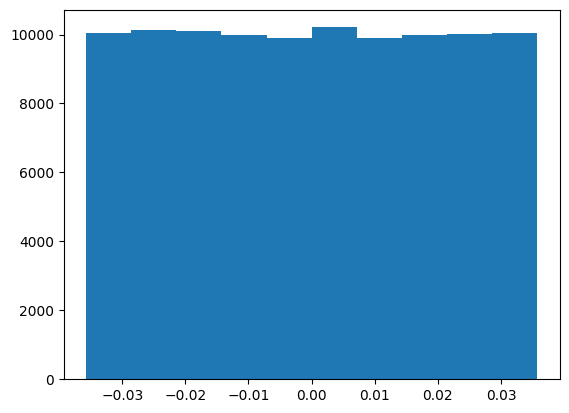

In [8]:
import matplotlib.pyplot as plt

# 기본 초기화된 파라미터 확인
init_params = next(iter(model.parameters())).detach().numpy().reshape(-1)
plt.hist(init_params)
plt.show()

In [9]:
# 위 방법처럼도 구현할 수 있으나, 더 간단하게 nn.Sequential로 구현할 수 있습니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Neural Network을 구성하는 layer들을
        # initialize하는 부분
        self.fc_layers = nn.Sequential(
            nn.Linear(784, 128),  # Kaiming
            nn.ReLU(),
            nn.Linear(128, 64),  # Kaiming
            nn.ReLU(),
            nn.Linear(64, 10),  # Xavier
            nn.Sigmoid(),
        )

        self._init_weights(self.fc_layers[0], mode='kaiming')
        self._init_weights(self.fc_layers[1], mode='kaiming')
        self._init_weights(self.fc_layers[2], mode='xavier')

    def forward(self, x):
        # Neural Network의 forward pass을 정의하는 부분
        # x은 input tensor
        x = torch.flatten(x, start_dim=1)
        x = self.fc_layers(x)
        return x

    def _init_weights(self, module, mode='xavier'):
        if isinstance(module, nn.Linear):
            if mode == 'xavier':
                torch.nn.init.xavier_normal_(module.weight)
            elif mode == 'kaiming':
                torch.nn.init.kaiming_normal_(module.weight)

            if module.bias is not None:  # Bias에 대한 initialization
                module.bias.data.zero_()

In [10]:
model = NeuralNetwork()
model

NeuralNetwork(
  (fc_layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): Sigmoid()
  )
)

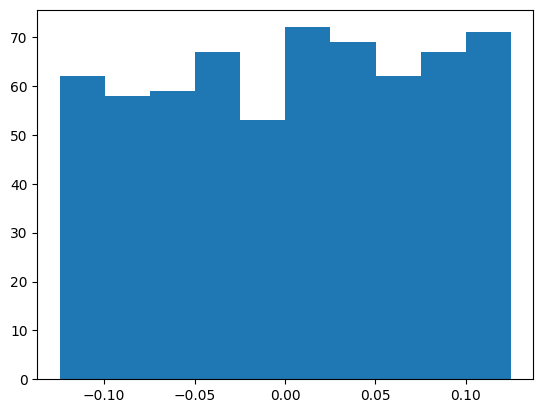

In [11]:
# Xavier 초기화 시각화
init_params=next(iter(model.fc_layers[4].parameters())).detach().numpy().flatten()
plt.hist(init_params)
plt.show()